# Project 1 - Regression to naive algebra function y = x + c

## Goal
To get basic understanding and first hand experience with tensorflow, I will regression to the simplest and most fundamental algebra `function $y = x + c$, where c is constant.

Mathematically, the basic unit of NN is $y = W * x + b$, a tensorflow model with two parameters $W=1.0$ and $b=c$ should be able to regression to $y = x + c$.


## Formulate inputs and outputs
Input $X = [0, 1, 2, ..., 999]$, output $Y = [-100, -99, ..., 899]$, target function $Y = X - 100$.

In [31]:
import numpy as np
import tensorflow as tf

x_train = np.fromiter(range(1000), dtype=np.float32)  # 0, 1, ..., 999
y_train = np.fromiter(range(1000), dtype=np.float32) - 100  # -100, -99, ..., 899

## Trap 1 - Input must be normalized to $(-1, 1)$ for any model to even run

I directly plugged in X_train as input of an arbitrary Keras model, and try to fit. This is the first trap that I ran into. The input variables are in $[1, 999]$ and Tensorflow could not fit properly when input variable are too far away from $(-1, 1)$ range due to the exploding (or vanishing) gradients.

*Lesson*: Always normalize input variables within $(-1, 1)$.

In [32]:
def normalize(x):
    return x / 1000.  # 0, ..., 0.999

x_train = normalize(x_train)
y_train = normalize(y_train)
# Note the way I normalize y_train here is incorrect, will describe in Trap 3

## Trap 2 - Must define input_shape in Keras model to avoid confusion
Then I created a few arbitrary Keras models looking like
```python
model = tf.keras.models.Sequential([tf.keras.layers.Dense(2, kernel_initializer='..', activation='..'), ...]) 
```
, and none of these models work, no matter how I change layers, kernel_intializers, activations, loss and metrics. These models predict identical numbers for different input variables, that looks wrong!

Why? I later figured it's important to define correct input_shape for the first layer in a model. Otherwise, tensorflow's interpretaion of input variable was not be what I have assumed.

*Lesson*: Always define correct input shape for at least the first layer of Keras model.

In [33]:
# Create a one-hidden layer model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, kernel_initializer='random_uniform', activation='linear', input_shape=[1])
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mae'])

model.fit(x_train, y_train, epochs=100)
model.evaluate(x_train, y_train)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 301us/sample - loss: 0.1376 - mae: 0.3018
Epoch 2/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0636 - mae: 0.2118
Epoch 3/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0461 - mae: 0.1853
Epoch 4/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.0398 - mae: 0.1728
Epoch 5/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0361 - mae: 0.1645
Epoch 6/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0331 - mae: 0.1572
Epoch 7/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.0304 - mae: 0.1508
Epoch 8/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0280 - mae: 0.1445
Epoch 9/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0257 - mae: 0.1384
Epoch 10/100
1000/1000 [==============================] - 0s 46us/sa

Epoch 80/100
1000/1000 [==============================] - 0s 62us/sample - loss: 6.4900e-05 - mae: 0.0070
Epoch 81/100
1000/1000 [==============================] - 0s 67us/sample - loss: 5.9714e-05 - mae: 0.0067
Epoch 82/100
1000/1000 [==============================] - 0s 73us/sample - loss: 5.4916e-05 - mae: 0.0064
Epoch 83/100
1000/1000 [==============================] - 0s 61us/sample - loss: 5.0486e-05 - mae: 0.0061
Epoch 84/100
1000/1000 [==============================] - 0s 68us/sample - loss: 4.6447e-05 - mae: 0.0059
Epoch 85/100
1000/1000 [==============================] - 0s 53us/sample - loss: 4.2701e-05 - mae: 0.0056
Epoch 86/100
1000/1000 [==============================] - 0s 59us/sample - loss: 3.9222e-05 - mae: 0.0054
Epoch 87/100
1000/1000 [==============================] - 0s 55us/sample - loss: 3.6043e-05 - mae: 0.0052
Epoch 88/100
1000/1000 [==============================] - 0s 50us/sample - loss: 3.3126e-05 - mae: 0.0050
Epoch 89/100
1000/1000 [======================

[1.1561665770386753e-05, 0.0029366584]

## Summarize model and visualization
Let's summarize this model and see how many parameters are in each layer. Then visualize this model as a DAG.

As I designed, this is a super simple model with a total of two parameters (one weight parameter W and one bias parameter b).

In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


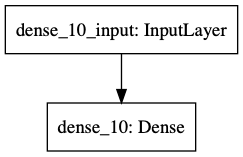

In [35]:
from tensorflow.keras.utils import plot_model, model_to_dot
from IPython.display import SVG
plot_model(model, to_file='model.png')

Let's compare predicted output values against expected output values in the training set.

In [36]:
y_predict = model.predict(x_train)
print ("X_train={}".format(x_train[0:5]))
print ("Y_train={}".format(y_train[0:5]))
print ("Y_predict={}".format(y_predict[0:5]))

X_train=[0.    0.001 0.002 0.003 0.004]
Y_train=[-0.1   -0.099 -0.098 -0.097 -0.096]
Y_predict=[[-0.09372895]
 [-0.09274063]
 [-0.09175231]
 [-0.09076399]
 [-0.08977568]]


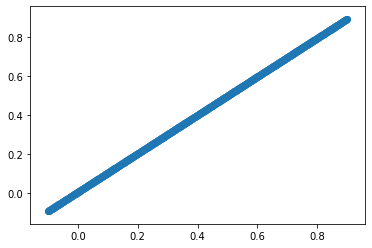

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_predict)

Yeah, this is exactly what I expected! Tensorflow did a good job fitting $ y = x + c$ using a simple model with two parameters and linear activation!

## Trap 3 - Selection of activation function and normalization of y
The most commonly used activation function (based on the little knowledge that I know about DNN) is {ReLU}.

### ReLU (Rectified Linear Unit)
$ ReLU(x) = max(x, 0)$

When input variable is greater than 0, return input variable as is. Otherwise, when input variable is negative, return 0.

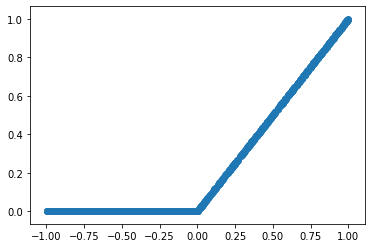

In [38]:
def Relu(x):
    return max(x, 0)

import numpy as np
input_x = np.random.uniform(-1, 1, 1000)
output_relu = [Relu(x) for x in input_x]
plt.scatter(input_x, output_relu)

However, for this particular project, given two restrictions:
1) simulate $y = x + c$ using a model with only two parameters (one weight parameter and one bias parameter), and
2) the way I normalized y_train made y_train values fall within $[-0.1, 0.899]$.

, the only activation function that satisfies both restrctions is `linear` function.

While restriction 1) was what I placed to play with tensorflow, 2) was surely a bad normalzation which makes it impossible to use `ReLU` as the only activation function and still meet 1). 

- ReLU output is always greater than or equal to 0, and can not fit to y values within $[-0.1, 0)$ in a two parameter model. 

By using a different normalization function which scales y_train values to be all positive, we can still build a model with two parameters and use `ReLU` as activation function.

## Trap 4 - loss and metric

During my first few tries, I copied/pasted tensorflow quick start tutorial code, which looks like
```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

However, it's important to understand my problem, and use the right loss and metrics. This particular project is a linear regression problem, NOT a classification problem.

- Optimzer does not matter for this naive problem.
- loss function `sparse_categorical_crossentropy` `sparse_categorical_crossentropy` works for *one-hot encoded* classification problem, NOT regression problem. e.g., when output y variable look like
```python
[1,0,0] - for class A
[0,1,0] - for class B
[0,0,1] - for class C
```
- , while `mean_squared_error` works for regression problem.
- metric `accuracy` works classification problem, but NOT regression problem. 
- , while `mae` or `RMSE` work for regression problem.

`mae` stands for `Mean Absolute Error`, it is  
$$
\frac{\sum_{i=0}^{n-1}(|{ytrain}_i - ypredict_i|}{n}
$$
, the mean of absolute difference between predict output and expected output.

`RMSE` stands for `Root mean squared error`, it is
$$
\sqrt{\frac{\sum_{i=0}^{n-1}(ytrain_i - ypredict_i)^2 }{n}}
$$

## Conclusion

I have successfully created a super naive model with two parameters to regression to algebra function $y = x + c$.

晚上加鸡腿!

I will regression to more basic algebra functions such as  `addition`, `multiplication`, `division`, `log`, `XOR` in future projects.